# Title: Loan Approval Prediction Project

Description:
The Loan Approval Prediction Project is a data science project aimed at predicting the likelihood of loan approval for applicants based on various factors. It leverages machine learning algorithms to analyze historical loan data and predict whether a loan application will be approved or rejected.

Objective:
The primary objective of this project is to develop a predictive model that can assist financial institutions in automating the loan approval process. By analyzing applicant information such as income, education, credit score, and assets, the model aims to provide insights into the likelihood of loan approval, helping lenders make informed decisions efficiently and accurately.

About The Dataset:
The dataset contains several predictor variables and one target variable or outcome.  no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value are the predictor variables and loan_status is the target variable.

Key Features:

Data Preprocessing: The project involves cleaning and preprocessing the loan dataset, handling missing values, encoding categorical variables, and scaling numerical features to prepare the data for modeling.
Exploratory Data Analysis (EDA): Exploratory data analysis techniques are applied to gain insights into the loan dataset, visualize distributions, correlations, and patterns, and identify important features for predictive modeling.
Machine Learning Modeling: Various machine learning algorithms such as logistic regression, support vector classification (SVC), and decision trees are trained on the preprocessed data to build predictive models for loan approval.
Model Evaluation: The performance of each model is evaluated using metrics such as accuracy, precision, recall, and F1-score to assess their effectiveness in predicting loan approval outcomes.
Deployment: The best-performing model is selected for deployment, and a simple web application or API may be developed to allow users to input their information and receive predictions on loan approval

In [94]:
!pip install scikit-learn

In [95]:
import matplotlib as matplotlib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users\Dipanwita Sikder\Documents\Python Project\loan_approval_dataset.csv")


In [96]:
#Display sample of the dataset
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1566,1567,5,Not Graduate,No,3700000,11700000,4,413,8400000,5500000,12000000,2700000,Approved
2297,2298,4,Not Graduate,Yes,9000000,31100000,8,896,7100000,4400000,23400000,13100000,Approved
405,406,2,Not Graduate,Yes,1800000,5700000,4,809,1200000,1900000,6300000,2400000,Approved
404,405,3,Graduate,No,500000,1000000,20,501,800000,800000,900000,200000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


In [97]:
#Feature Engineering
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)
# Display the shape of the dataset (rows, columns) of Train dataset
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (4269, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [98]:

# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']


In [99]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)


def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')


def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')

In [100]:
for col in df.columns:
    valuecounts(col)
    #     uniquevals(col)
    print("-" * 75)

# select all categorical data type and stored in one dataframe and select all other numarical and stored in one data frame
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

Valuecounts of  no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of  education is: 2
---------------------------------------------------------------------------
Valuecounts of  self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of  income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of  loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of  loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of  cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of  loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
------------------------------------------------------------------------

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

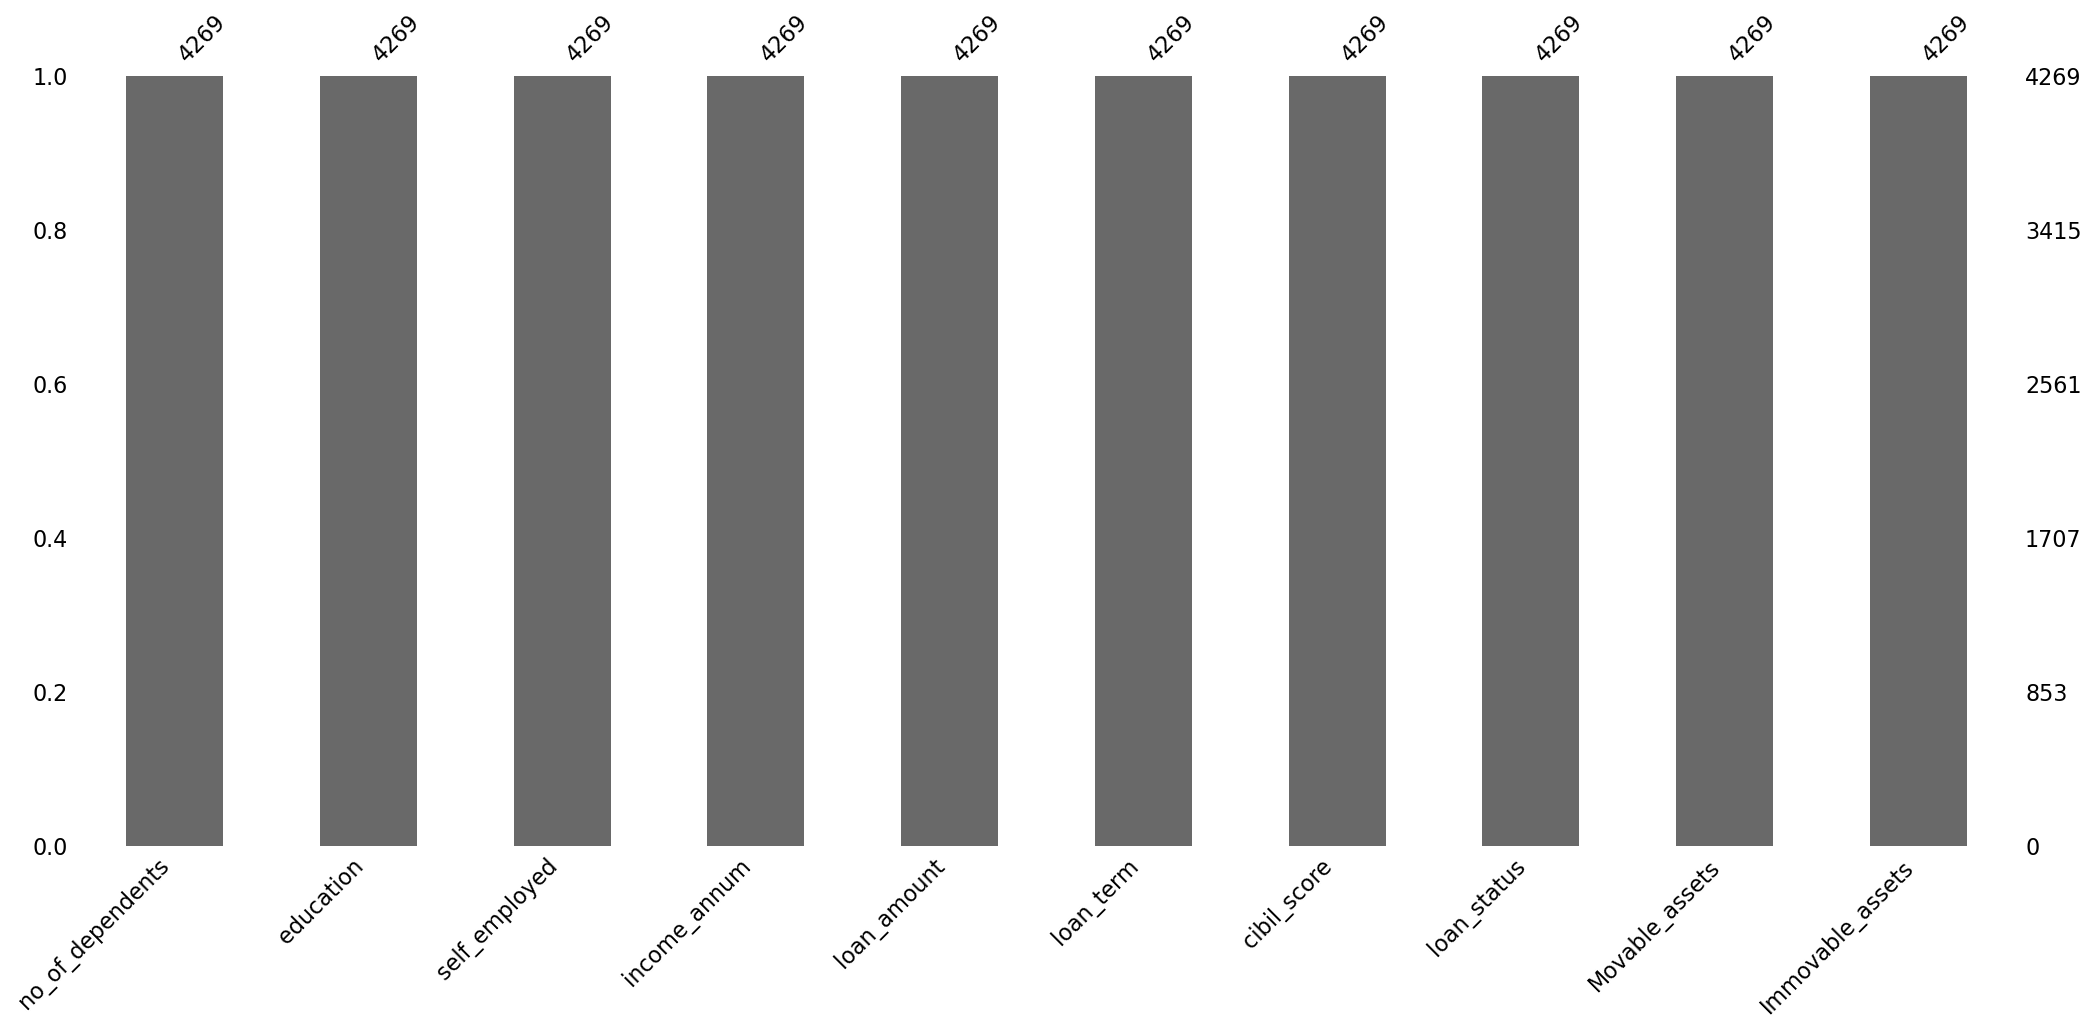

In [101]:
#Data Cleaning

import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

msno.bar(df)
'''
so on observation we can see that the null value is not present in Loan Approval Data Set dataset , as shown ↓
'''
print()

In [102]:
df.isna().sum()

df.describe()



,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


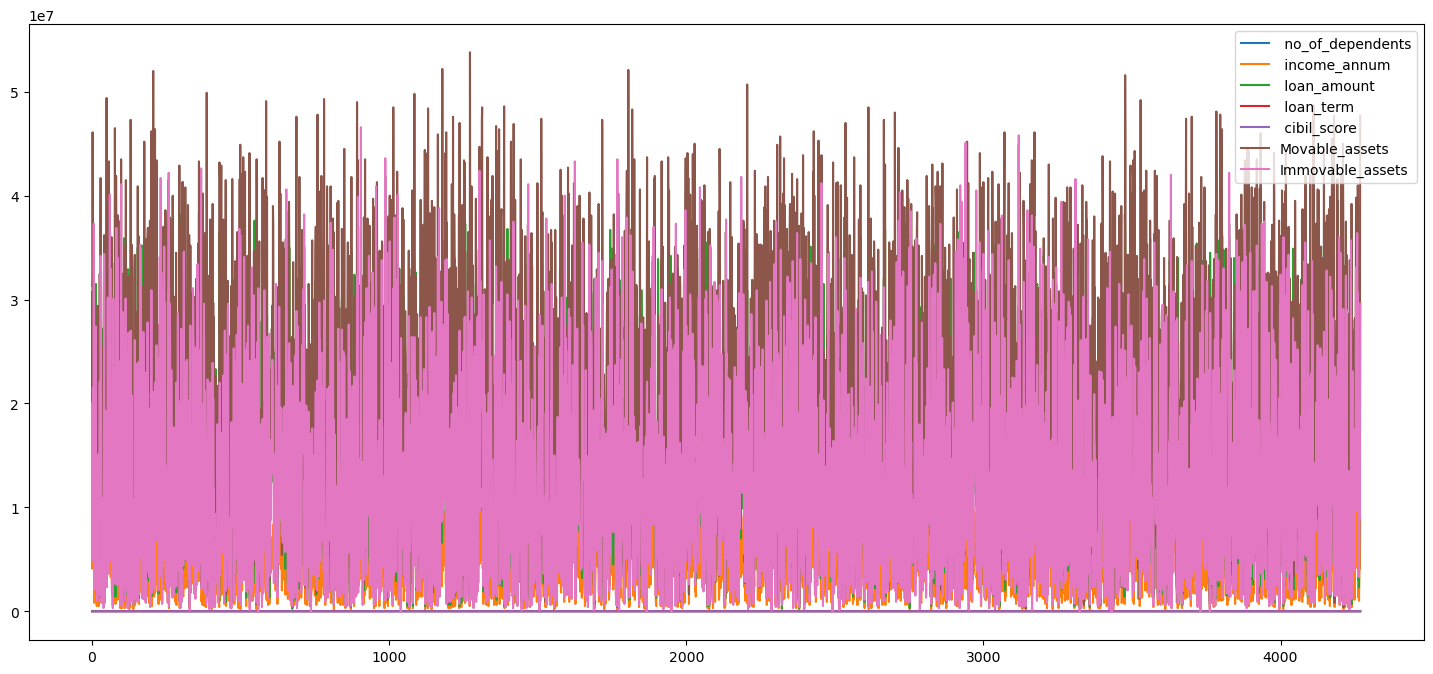

<AxesSubplot:xlabel=' no_of_dependents', ylabel='count'>

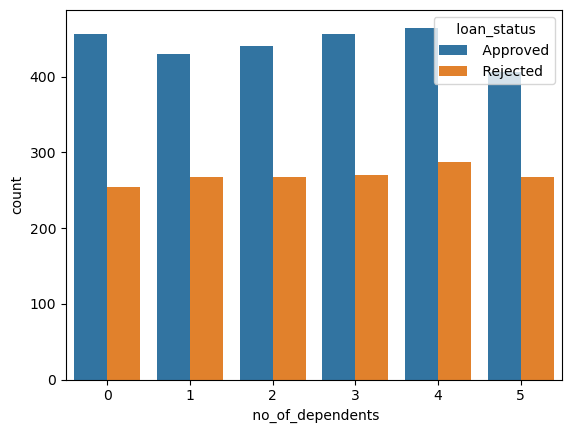

In [104]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt


import seaborn as sns
# sns.set_style('dark')
df.plot(figsize=(18, 8))

plt.show()

#Number of Dependants Vs Loan Status
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

Text(0.5, 1.0, 'Loan Status by Education')

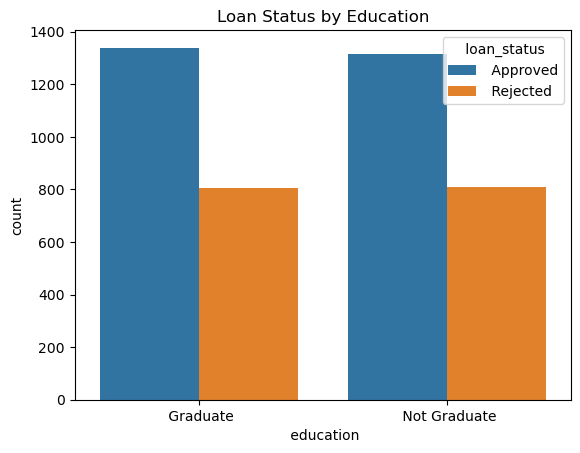

In [105]:
#Education Vs Loan Status
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')


Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

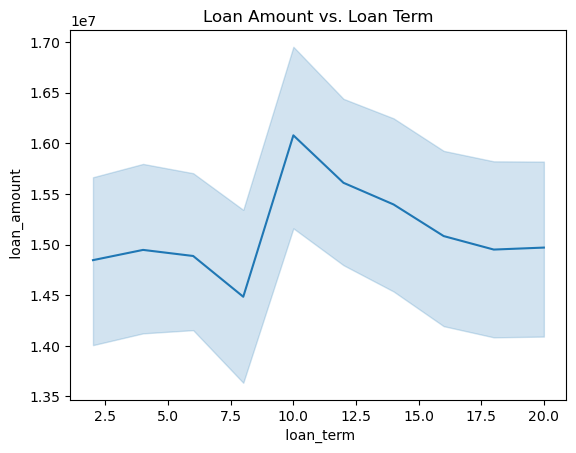

In [106]:
#Loan_Amount And Term
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')


<AxesSubplot:xlabel=' loan_term', ylabel=' loan_amount'>

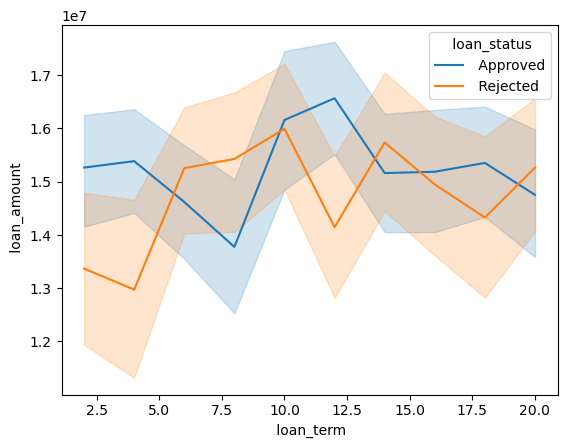

In [107]:
#Loan amount & tenure Vs Loan Status
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')


<AxesSubplot:xlabel=' cibil_score', ylabel='Count'>

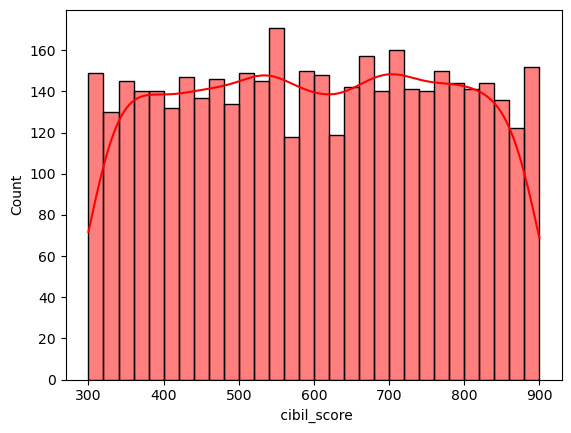

In [108]:
#CIBIL Score Distribution
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='red')


<AxesSubplot:xlabel=' loan_status', ylabel=' cibil_score'>

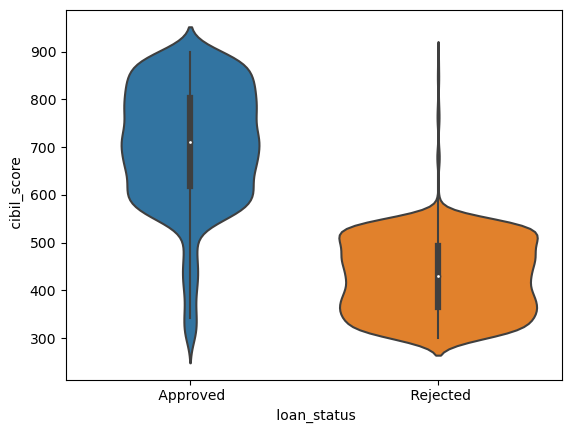

In [109]:
#CIBIL Score Vs Loan Status
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

Text(0.5, 1.0, 'Immovable_assets ')

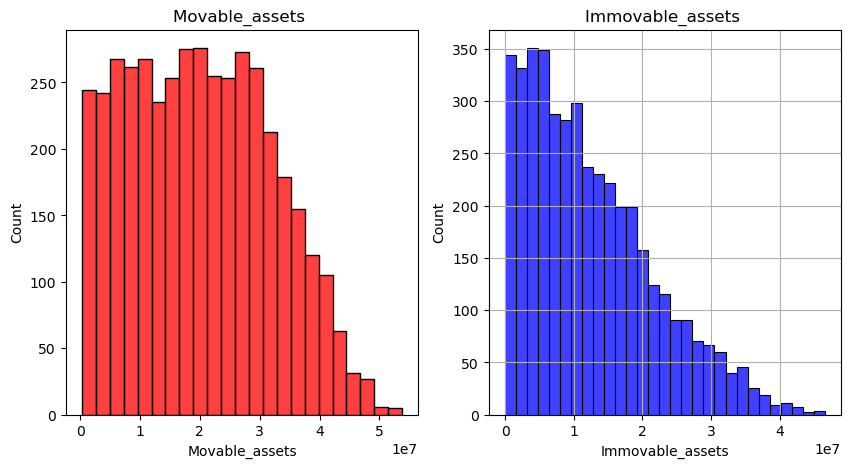

In [110]:
#Asset Distribution
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")


<AxesSubplot:xlabel='Immovable_assets', ylabel='Count'>

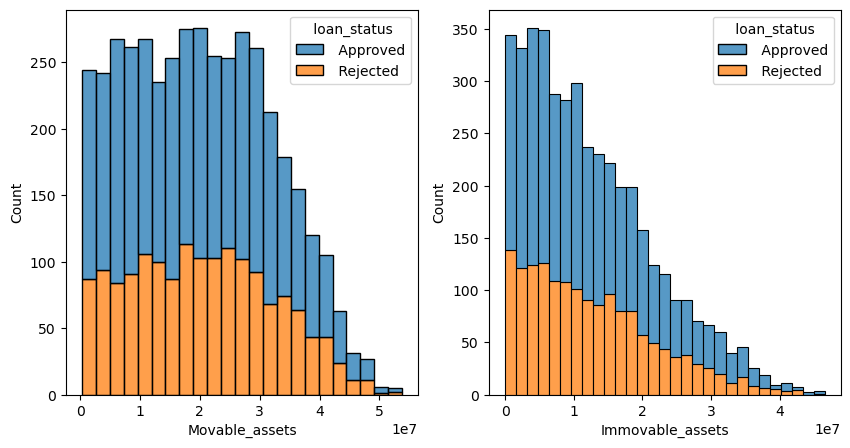

In [111]:
#Assets Vs Loan Status
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

In [112]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [113]:
#Data Preprocessing

##Label Encoding the categorical variables
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [114]:
#Machine Learning Model Decision
##from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

##Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.3, random_state=42)

In [115]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions_for_lgr= lgr.predict(X_test)

# Calculate accuracy
accuracy_lgr = accuracy_score(y_test, predictions_for_lgr)
print("Accuracy of Logistic Regression:", accuracy_lgr)

Accuracy of Logistic Regression: 0.726775956284153


In [116]:
#Support Vector Classification (SVC)
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions_for_svc = model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, predictions_for_svc)
print("Accuracy of SVC:", accuracy_svc)

Accuracy of SVC: 0.6323185011709602


In [117]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()
# Training the model using the training data
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
# Training Accuracy
dtree.score(X_train, y_train)
# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test, dtree_pred)
print("Accuracy of Decision tree:", accuracy_decision_tree)

Accuracy of Decision tree: 0.9797033567525371


In [118]:
# Store accuracies in a dictionary
test_results = {
    'Model': ['Logistic Regression', 'SVC', 'Decision Tree'],
    'Accuracy': [accuracy_lgr, accuracy_svc, accuracy_decision_tree]
}

# Create a DataFrame
results_df = pd.DataFrame(test_results)

# Display the results
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.726776
1                  SVC  0.632319
2        Decision Tree  0.979703


In [119]:
# Selecting the best model
best_accuracy = max(accuracy_lgr, accuracy_svc, accuracy_decision_tree)


In [120]:
if best_accuracy == accuracy_lgr:
    print("Logistic Regression has the best accuracy.")
    best_model = lgr
elif best_accuracy == accuracy_svc:
    print("SVC has the best accuracy.")
    best_model = svc
else:
    print("Decision tree has the best accuracy.")
    best_model = dtree

Decision tree has the best accuracy.


In [121]:
print(best_model)

DecisionTreeClassifier()


In [122]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer
import pandas as pd

# New data with feature names aligned to the training data
X_new = pd.DataFrame({
    'no_of_dependents': [2],
    'education': ['Not Graduate'],
    'self_employed': ['No'],
    'income_annum': [60000],
    'loan_amount': [20000],
    'loan_tenure': [5],
    'cibil_score': [750],
    'residential_asset_value': [150000],
    'commercial_asset_value': [50000],
    'luxury_asset_value': [10000],
})

# Define columns to match X_train
columns_to_match = X_train.columns

# Reindexing X_new to align columns with X_train
X_new = X_new.reindex(columns=columns_to_match)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('best_model', best_model)
])

pipeline.fit(X_test, y_test)

predictions = pipeline.predict(X_new)
# Mapping predicted values to labels
predicted_label = 'Approved' if predictions[0] == 1 else 'Rejected'

# Printing the predicted value
print(f"Prediction: {predicted_label}")



Prediction: Approved
